In [6]:
##!hostname -I
##!cat /opt/mirthconnect/logs/mirth.log

In [3]:
#!pip install python-dotenv
#!pip install requests

In [1]:
import subprocess
import requests
import os
import csv
import shutil
from dotenv import load_dotenv

mirth_base_url = "https://localhost:9443"

In [22]:
# Load environment variables from .env file
load_dotenv()
username = os.getenv("MIRTH_USERNAME")
password = os.getenv("MIRTH_PASSWORD")

# Function to get the API session token
def get_session_token():
    url = f"{mirth_base_url}/api/users/_login"
    print(url)
    payload = "username=" + username + "&password=" + password
    headers = {"Content-Type": "application/x-www-form-urlencoded",
               "X-Requested-With": "XMLhttpRequest"
               }
    
    response = requests.post(url, headers=headers, data=payload)
    
    if response.status_code == 200:
        return response.cookies["JSESSIONID"]
    else:
        print(f"Failed to log in: {response.status_code}")
        return None

# Function to get channel details
def get_channels(session_token):
    url = f"{mirth_base_url}/channels"
    headers = {"Content-Type": "application/json"}
    cookies = {"JSESSIONID": session_token}
    
    response = requests.get(url, headers=headers, cookies=cookies)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to get channels: {response.status_code}")
        return None

# Function to write data to CSV
def write_channels_to_csv(channels, filename="mirth_channels.csv"):
    with open(filename, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["ChannelName", "ChannelID", "GroupName", "IsEnabled", "IsDeployed"])
        
        for channel in channels:
            channel_name = channel["name"]
            channel_id = channel["id"]
            group_name = channel.get("group", "Default Group")
            is_enabled = channel["enabled"]
            is_deployed = channel["deployed"]
            
            writer.writerow([channel_name, channel_id, group_name, is_enabled, is_deployed])

# Main function to run the script
def main():
    session_token = get_session_token()
    
    if session_token:
        channels = get_channels(session_token)
        
        if channels:
            write_channels_to_csv(channels)
            print("CSV file created successfully!")
        else:
            print("No channels found.")
    else:
        print("Unable to log in to Mirth.")

if __name__ == "__main__":
    main()



https://localhost:9443/api/users/_login


SSLError: HTTPSConnectionPool(host='localhost', port=9443): Max retries exceeded with url: /api/users/_login (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))

In [4]:
import os

# Define paths and variables
Upgrade_dir = r"C:\Users\Administrator\Desktop\MirthUpgradeProject"
backup_dir = os.path.join(Upgrade_dir, "BackUp")
mirth_dir = r"C:\Program Files\Mirth Connect"
mirth_config_dir = os.path.join(mirth_dir, "conf")
mirth_libraries_dir = os.path.join(mirth_dir, "custom-lib")
mirth_channels_file = os.path.join(backup_dir, "channels_backup.xml")
mirth_properties_file = os.path.join(mirth_config_dir, "mirth.properties")

# Create backup directory if it doesn't exist
if not os.path.exists(backup_dir):
    os.makedirs(backup_dir)

# Step 1: Backup Configuration, Channels, and Libraries
The following code would use Python subprocesses to interact with the file system and shell commands:

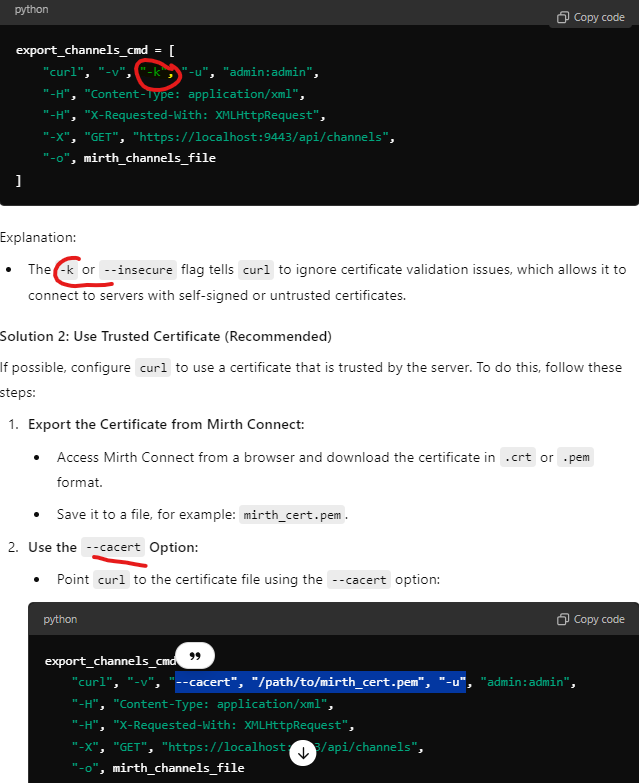

In [4]:
# Step 1.1: Backup Mirth Configuration Files
config_backup_path = os.path.join(backup_dir, "mirth_configuration_backup")
shutil.copytree(mirth_config_dir, config_backup_path)

# Step 1.2: Backup Mirth Libraries
lib_backup_path = os.path.join(backup_dir, "mirth_custom_libraries_backup")
shutil.copytree(mirth_libraries_dir, lib_backup_path)

# Step 1.3: Backup Mirth Channels
export_channels_cmd = [
    "curl", "-v", "-k", "-u", "admin:admin",
    # "curl", "-v", "--cacert", "/path/to/mirth_cert.pem", "-u", "admin:admin", 
    "-H", "Content-Type: application/xml",
    "-H", "X-Requested-With: XMLhttpRequest",
    "-X", "GET", "https://localhost:9443/api/channels",
    "-o", mirth_channels_file
]
# subprocess.run(export_channels_cmd)
result = subprocess.run(export_channels_cmd, capture_output=True, text=True)
# print("Standard Output:\n", result.stdout)
# print("Standard Error:\n", result.stderr)

# Check if the backup file was created successfully
if os.path.exists(mirth_channels_file):
    print(f"Channels successfully exported to: {mirth_channels_file}")
    print("Backup completed successfully!")
else:
    print("Failed to export channels. Please check the error messages.")

Channels successfully exported to: C:\Users\Haitem.ELAaouani\OneDrive - Access UK Ltd\Documents\MirthDev\MirthUpgrade\BackUp\channels_backup.xml
Backup completed successfully!


# Step 2: Install New Version of Mirth
Ensure the Mirth service is stopped before installing a new version:

In [11]:
import os
import subprocess

installers_dir = os.path.join(Upgrade_dir, "Installers")
mirth_installer = os.path.join(installers_dir, "mirthconnect-3.9.1.b263-windows-x64.exe")
java_installer = os.path.join(installers_dir, "amazon-corretto-8.422.05.1-windows-x64-jre.msi")
mirth_service_name = "Mirth Connect"
response_file = os.path.join(installers_dir, "Mirth_response.varfile")

# Stop the Mirth Service (Windows Service command)
subprocess.run(["net", "stop", mirth_service_name], capture_output=True, text=True)
#subprocess.run(["sudo", "systemctl", "stop", "mirthconnect"])

# Install Java 17 Corretto
# Install Java Corretto in silent mode
java_install_cmd = [
    "msiexec",
    "/i",
    java_installer,
    "/qn",  # Quiet mode with no UI
    "/norestart"  # Prevent automatic restart
]

try:
    result = subprocess.run(java_install_cmd, capture_output=True, text=True, check=True)
    print("Java Corretto installation completed successfully.")
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print(f"Error during Java Corretto installation: {e}")
    print(f"Error output: {e.stderr}")
#java_install_cmd = ["msiexec", "/i", java_installer, "/quiet", "/norestart"]
#print(java_install_cmd)
#subprocess.run(java_install_cmd, capture_output=True, text=True)
#print("Amazon Corretto JDK 17 installation completed.")

# Install Mirth Connect 4.5.2
print("Installing Mirth Connect...")


# Initialize result_install to None
result_install = None

try:
    mirth_install_cmd = [
        mirth_installer,
        "-q",  # Quiet mode
        "-varfile", response_file,
        "-overwrite",
        "-noFailures"
    ]
    print(mirth_install_cmd)
    result_install = subprocess.run(mirth_install_cmd, capture_output=True, text=True, check=True)
    print("Mirth Connect 4.5.2 installation completed.")
    print("Standard Output:\n", result_install.stdout)
    print("Standard Error:\n", result_install.stderr)
except subprocess.CalledProcessError as e:
    print(f"Failed to install Mirth Connect: {e}")
    print(f"Standard Output:\n{e.stdout}")
    print(f"Standard Error:\n{e.stderr}")

    # Log the exact command used
    print(f"Command Used:\n{' '.join(mirth_install_cmd)}")

    # Check if the installer generated a log file in the current directory
    log_file = os.path.join(installers_dir, "mirthconnect_install.log")
    if os.path.exists(log_file):
        with open(log_file, 'r') as f:
            print(f"Contents of Mirth installer log:\n{f.read()}")
    else:
        print("No installer log found in the expected location.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")


 
# Install Mirth Connect Launcher
# Define paths with quotes
mirth_launcher_installer = os.path.join(installers_dir, "mirth-administrator-launcher-latest-windows-x64.exe")

# Initialize result_install to None
result_install = None

try:
    print("Installing Mirth Connect Launcher...")
    mirthLauncher_install_cmd = [
        mirth_launcher_installer,
        "-q",  # Quiet mode
        "-overwrite",
        "-noFailures"
    ]
    print(mirthLauncher_install_cmd)
    result_install = subprocess.run(mirthLauncher_install_cmd, capture_output=True, text=True, check=True)
    print("Mirth Connect Launcher installation completed.")
    print("Standard Output:\n", result_install.stdout)
    print("Standard Error:\n", result_install.stderr)
except subprocess.CalledProcessError as e:
    print(f"Failed to install Mirth Connect Launcher: {e}")
    print(f"Standard Output:\n{e.stdout}")
    print(f"Standard Error:\n{e.stderr}")

    # Log the exact command used
    print(f"Command Used:\n{' '.join(mirthLauncher_install_cmd)}")

    # Check if the installer generated a log file in the current directory
    log_file = os.path.join(installers_dir, "mirthconnectLauncher_install.log")
    if os.path.exists(log_file):
        with open(log_file, 'r') as f:
            print(f"Contents of Mirth Launcher installer log:\n{f.read()}")
    else:
        print("No installer log found in the expected location.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")   

Java Corretto installation completed successfully.

Installing Mirth Connect...
['C:\\Users\\Administrator\\Desktop\\MirthUpgradeProject\\Installers\\mirthconnect-3.9.1.b263-windows-x64.exe', '-q', '-varfile', 'C:\\Users\\Administrator\\Desktop\\MirthUpgradeProject\\Installers\\Mirth_response.varfile', '-overwrite', '-noFailures']
Mirth Connect 4.5.2 installation completed.
Standard Output:
 The installation directory has been set to C:\Program Files\Mirth Connect.
Extracting files ...
Finishing installation ...

Standard Error:
 
Installing Mirth Connect Launcher...
['C:\\Users\\Administrator\\Desktop\\MirthUpgradeProject\\Installers\\mirth-administrator-launcher-latest-windows-x64.exe', '-q', '-overwrite', '-noFailures']
Mirth Connect Launcher installation completed.
Standard Output:
 The installation directory has been set to C:\Program Files\Mirth Connect Administrator Launcher.
Uninstalling previous version
Extracting files ...
Finishing installation ...

Standard Error:
 


# Step 3: Import Configuration Files, Channels, and Libraries
Once the new Mirth version is installed, the following commands will help import the saved configuration files, channels, and libraries:

In [ ]:
# Copy the previous configuration and libraries to the new Mirth installation
new_mirth_dir = "/opt/mirthconnect-4.5.2"
new_mirth_config_dir = os.path.join(new_mirth_dir, "conf")
new_mirth_libraries_dir = os.path.join(new_mirth_dir, "custom-lib")

# Copy old configuration to the new version
shutil.copytree(config_backup_path, new_mirth_config_dir, dirs_exist_ok=True)

# Copy old libraries to the new version
shutil.copytree(lib_backup_path, new_mirth_libraries_dir, dirs_exist_ok=True)

# Import Channels using Mirth REST API
import_channels_cmd = [
    "curl", "-u", "admin:admin", "-H", "Content-Type: application/xml",
    "-X", "POST", "http://localhost:8080/api/channels",
    "--data-binary", f"@{mirth_channels_file}"
]
subprocess.run(import_channels_cmd)


# Step 4: Start the New Mirth Service


In [18]:
# Start mcmanager before starting the Mirth service
print("Starting mcmanager...")
mcmanager_cmd = [
    "runas", "/user:Administrator",  # Run as administrator
    os.path.join("C:\Program Files\Mirth Connect", "mcmanager.exe")  # Adjust the path if needed
]
subprocess.run(mcmanager_cmd, capture_output=True, text=True)

Starting mcmanager...


CompletedProcess(args=['runas', '/user:Administrator', 'C:\\Program Files\\Mirth Connect\\mcmanager.exe'], returncode=1, stdout='Enter the password for Administrator: \x00\n', stderr='')

In [19]:
# Define paths
mcmanager_path = os.path.join("C:\\Program Files\\Mirth Connect", "mcmanager.exe")

# Run mcmanager with elevated privileges
try:
    print("Starting mcmanager with elevated privileges...")
    subprocess.Popen(f'start "" "{mcmanager_path}"', shell=True)
    print("mcmanager should be running now.")
except Exception as e:
    print(f"An error occurred: {e}")


Starting mcmanager with elevated privileges...
mcmanager should be running now.


In [24]:
mirth_service_name = "Mirth Connect Service"

# Start the Mirth Connect Service
try:
    print(f"Starting {mirth_service_name} service...")
    start_result = subprocess.run(["net", "start", mirth_service_name], capture_output=True, text=True, check=True)
    subprocess.Popen(f'net start "Mirth Connect Service"', shell=True)
    print(f"{mirth_service_name} service started successfully.")
except subprocess.CalledProcessError as e:
    print(f"Failed to start {mirth_service_name} service: {e.stderr}")
    # Log the output of the command for debugging
    print(f"Standard Output:\n{e.stdout}")
    print(f"Standard Error:\n{e.stderr}")

Starting Mirth Connect Service service...
Failed to start Mirth Connect Service service: System error 5 has occurred.

Access is denied.


Standard Output:

Standard Error:
System error 5 has occurred.

Access is denied.




In [29]:
import subprocess

mirth_service_name = "Mirth Connect Service"

try:
    print(f"Starting {mirth_service_name}...")
    
    # Start the service using Popen
    process = subprocess.Popen(f'net start "Mirth Connect Service"', shell=True)
    
    # Wait for the process to complete
    process.wait()
    
    # Check the return code
    if process.returncode == 0:
        print(f"{mirth_service_name} started successfully.")
    else:
        print(f"Failed to start {mirth_service_name}. Return code: {process.returncode}")
        
except Exception as e:
    print(f"An error occurred: {e}")


Starting Mirth Connect Service...
Failed to start Mirth Connect Service. Return code: 2


In [27]:
import subprocess

mirth_service_name = "Mirth Connect Service"

try:
    print(f"Starting {mirth_service_name}...")
    
    # Start the service using subprocess.run
    result = subprocess.run(f'net start "{mirth_service_name}"', shell=True, capture_output=True, text=True)

    # Check the return code
    if result.returncode == 0:
        print(f"{mirth_service_name} started successfully.")
    else:
        print(f"Failed to start {mirth_service_name}.")
        print(f"Standard Output:\n{result.stdout}")
        print(f"Standard Error:\n{result.stderr}")
        
except Exception as e:
    print(f"An error occurred: {e}")


Starting Mirth Connect Service...
Failed to start Mirth Connect Service.
Standard Output:

Standard Error:
System error 5 has occurred.

Access is denied.




# Considerations:
- User Authentication: Replace admin:admin with your Mirth Connect credentials.
- Service Management: Commands like systemctl will only work on Linux-based systems. On Windows, use equivalent service management commands.
- Additional Dependencies: Make sure all dependencies required by the new Mirth version are satisfied.
- Database Compatibility: If using an external database, ensure schema compatibility between Mirth 3.9.1 and 4.5.2. Upgrading might involve database migrations.